In [74]:
import os
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [75]:
os.chdir(Path.home() / 'code/python/islp')

In [76]:
df = pd.read_csv('data/Auto.csv')
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
387,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
388,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
389,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
390,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


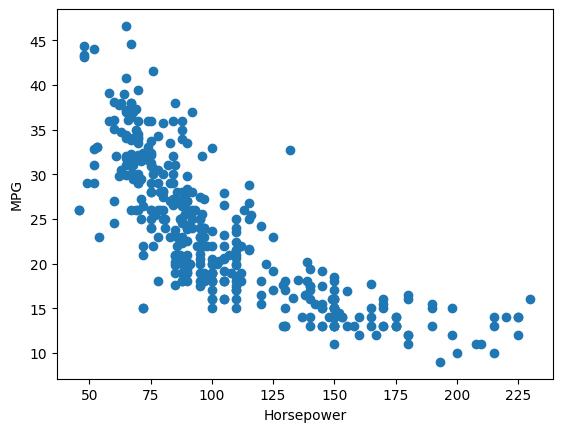

In [85]:
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.scatter(df['horsepower'], df['mpg'])
plt.show()

In [79]:
model = smf.ols('mpg ~ horsepower', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           7.03e-81
Time:                        15:30:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
predictions = model.get_prediction(pd.DataFrame({'horsepower': [98]}))
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


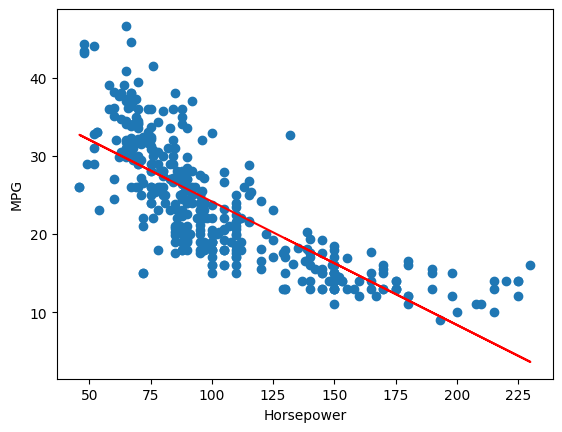

In [88]:
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.scatter(df['horsepower'], df['mpg'])
plt.plot(df['horsepower'].astype('float'), model.fittedvalues, color='red')
plt.show()

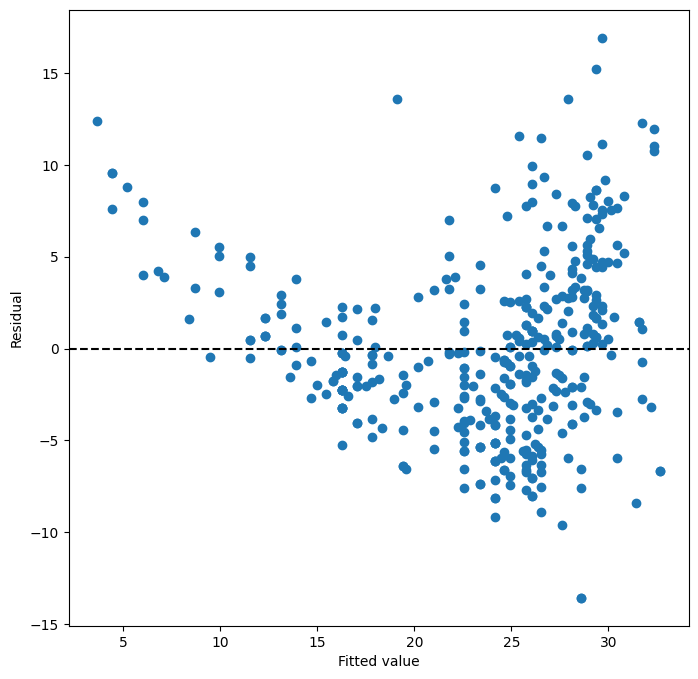

In [96]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(model.fittedvalues, model.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

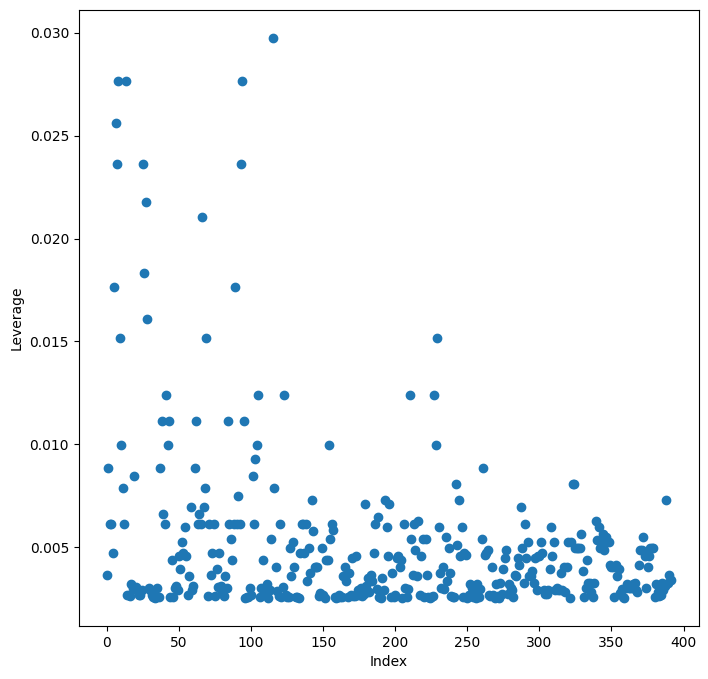

In [97]:
infl = model.get_influence()
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(np.arange(df.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
